In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from astropy.table import Table
from astropy.io import fits
import astropy.cosmology
from astropy import units as u
from astropy.coordinates import SkyCoord

### Gaia G<20.5

In [3]:
# load in catalog
quasar_fn = '/scratch/aew492/quasars/catalogs/catalog_G20.5.fits'
data_gaia = Table.read(quasar_fn, format='fits')
data_gaia.columns

<TableColumns names=('source_id','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2','redshift_spz_raw','redshift_spz_err','redshift_spz')>

In [4]:
# magnitudes
gs = data_gaia['phot_g_mean_mag']
bps = data_gaia['phot_bp_mean_mag']
rps = data_gaia['phot_rp_mean_mag']

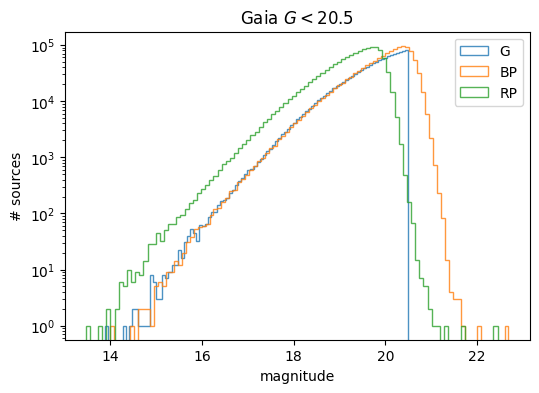

In [5]:
# compare G, BP and RP mag distributions?
nbins = 100
fig, ax = plt.subplots(figsize=(6,4))

a = 0.8

ax.hist(gs, bins=nbins, histtype='step', alpha=a, label='G')
ax.hist(bps, bins=nbins, histtype='step', alpha=a, label='BP')
ax.hist(rps, bins=nbins, histtype='step', alpha=a, label='RP')

ax.set_yscale('log')
ax.set_xlabel(r'magnitude')
ax.set_ylabel('# sources')
ax.set_title(r'Gaia $G<20.5$')
ax.legend()

In [6]:
max(gs), max(bps), max(rps)

(20.499998, 22.681377, 22.443089)

#### sum up total # sources < magnitudes

In [7]:
width = 0.1
minG = 18
maxG = 20.5
nmags = int((maxG-minG)/width)+1
mags = np.linspace(minG, maxG, nmags)

In [8]:
mags

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5])

In [9]:
counts5 = np.empty(nmags)
for i, mag in enumerate(mags):
    counts5[i] = np.sum(gs<=mag)

Text(0, 0.5, 'N < G')

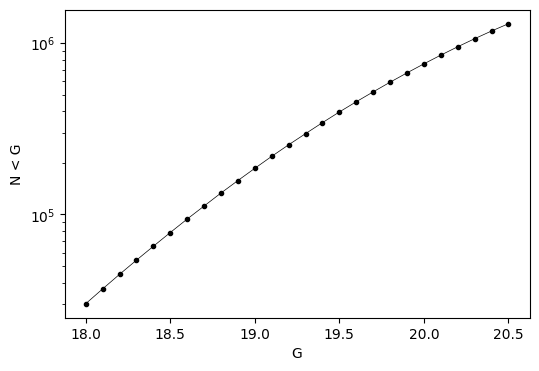

In [10]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(mags, counts5, 'k.-', lw=0.5)

ax.set_yscale('log')
ax.set_xlabel('G')
ax.set_ylabel('N < G')

### Gaia G<20.6

In [11]:
# load in catalog
quasar_fn = '/scratch/aew492/quasars/catalogs/gaia_candidates_clean.fits'
data_gaia = Table.read(quasar_fn, format='fits')
print(data_gaia.columns)
# magnitudes
gs = data_gaia['phot_g_mean_mag']
bps = data_gaia['phot_bp_mean_mag']
rps = data_gaia['phot_rp_mean_mag']

<TableColumns names=('source_id','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2')>


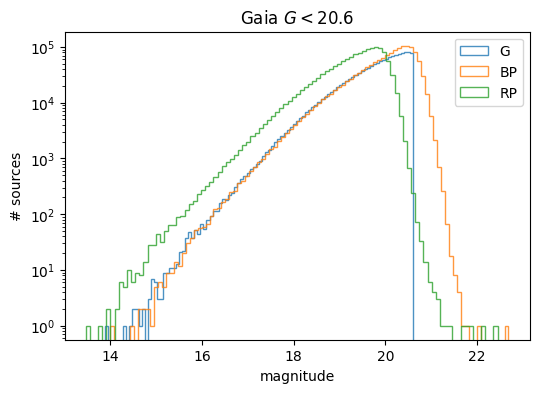

In [12]:
# compare G, BP and RP mag distributions?
nbins = 100
fig, ax = plt.subplots(figsize=(6,4))

a = 0.8

ax.hist(gs, bins=nbins, histtype='step', alpha=a, label='G')
ax.hist(bps, bins=nbins, histtype='step', alpha=a, label='BP')
ax.hist(rps, bins=nbins, histtype='step', alpha=a, label='RP')

ax.set_yscale('log')
ax.set_xlabel(r'magnitude')
ax.set_ylabel('# sources')
ax.set_title(r'Gaia $G<20.6$')
ax.legend()

In [13]:
# get the same magnitude counts for this catalog
width = 0.1
minG = 18
maxG = 20.6
nmags = int((maxG-minG)/width)+1
mags = np.linspace(minG, maxG, nmags)
counts6 = np.empty(nmags)
for i, mag in enumerate(mags):
    counts6[i] = np.sum(gs<=mag)

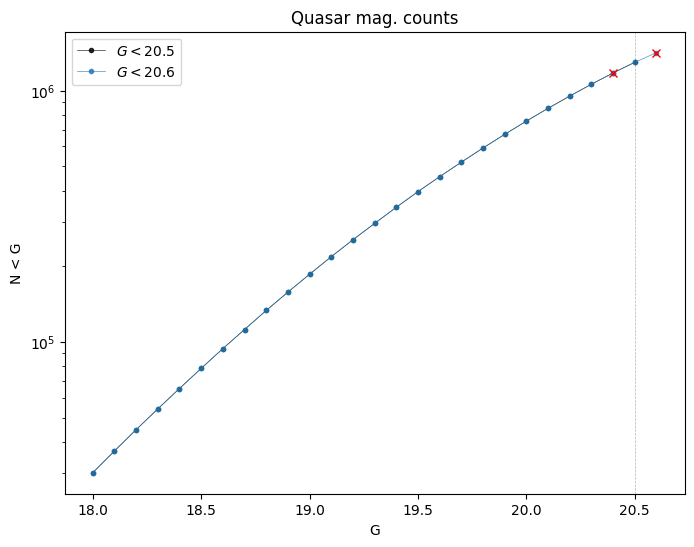

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(mags[:-1], counts5, 'k.-', lw=0.5, alpha=0.8, label=r'$G<20.5$')
ax.plot(mags, counts6, 'C0.-', lw=0.5, alpha=0.8, label=r'$G<20.6$')
ax.axvline(20.5, color='k', alpha=0.3, ls='--', lw=0.5)
ax.plot(mags[-1], counts6[-1], marker='x', color='r')
ax.plot(mags[-3], counts6[-3], marker='x', color='r')

ax.set_yscale('log')
ax.set_xlabel('G')
ax.set_ylabel('N < G')
ax.set_title('Quasar mag. counts')
ax.legend()

The slope of this curve at G=20.5 is
$$
x \equiv \frac{d\log N}{dS}
$$

In [15]:
# slope of interest:
m = (counts6[-1] - counts6[-3])/(mags[-1]-mags[-3])

In [16]:
# intercept to visualize: we want to pass through counts at G=20.5
b = counts6[-2]-m*mags[-2]
# x array
x = np.linspace(min(mags), max(mags), 100)

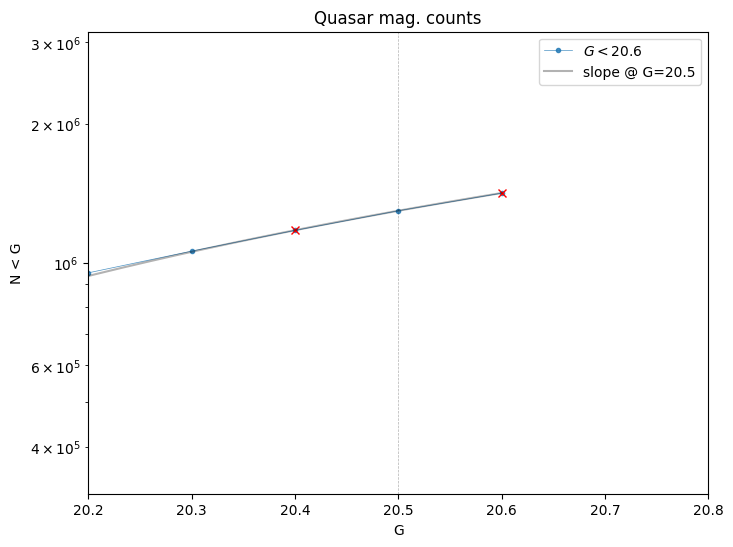

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(mags, counts6, 'C0.-', lw=0.5, alpha=0.8, label=r'$G<20.6$')
ax.axvline(20.5, color='k', alpha=0.3, ls='--', lw=0.5)

ax.plot(mags[-1], counts6[-1], marker='x', color='r')
ax.plot(mags[-3], counts6[-3], marker='x', color='r')

ax.plot(x, m*x+b, color='k', alpha=0.3, label='slope @ G=20.5')

ax.set_xlim((20.2,20.8))
ax.set_ylim((10**(5.5), 10**(6.5)))
ax.set_yscale('log')
ax.set_xlabel('G')
ax.set_ylabel('N < G')
ax.set_title('Quasar mag. counts')
ax.legend()

Now to get the actual slope value...

We have from Ellis & Baldwin 1984:
\begin{equation}
    \frac{dN}{d\Omega} (>S) \propto S^{-x}
\end{equation}

where $N$ is the number of sources, $\Omega$ is a solid angle (sr), and $S$ is some flux density (W/m$^2$/sr/Hz).

It follows that
\begin{equation}
    x = -\frac{d\ln N}{d\ln S} (>S)
\end{equation}

#### unit conversion

So we need to convert $G$ (AB magnitude) $\rightarrow$ $S$ (flux density).

$$
m_1 - m_2 = -2.5\log(\frac{f_1}{f_2})
$$

where
$$
f = \nu f_\nu
$$

AB magnitude is defined as
\begin{align}
m_{AB} &= -2.5\log(f_\nu) - 48.60 \\
\log{f_\nu} &= \frac{m_{AB} + 48.60}{-2.5} \\
\end{align}

In [18]:
def log_fnu(mag):
    return -(mag+48.6)/2.5

In [19]:
dlogN = np.log10(counts6[-1])-np.log10(counts6[-3])
dlogflux = log_fnu(mags[-1])-log_fnu(mags[-3])

In [20]:
x = -dlogN/dlogflux

In [21]:
x

1.0080084138836536

In [22]:
dmags = mags[-1]-mags[-3]
xHogg = 2.5*(dlogN)/dmags

In [24]:
xHogg

1.0080084138836356

In [23]:
dlogflux = log_fnu(mags[-1])-log_fnu(mags[-4])
dlogN = np.log10(counts6[-1])-np.log10(counts6[-4])